# **IBM Data Science Professional Certificate**
## **Course 10: Applied Data Science Capstone**
## **Peer-graded Assignment: Capstone Project - The Battle of Neighborhoods**
### *By: Michael Mak Chun Wai*
***

## <font color=blue>1. Use web scraping and data wrangling to create dataframe</font>

In [1]:
# Import libraries
import re
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
from geopy.geocoders import Nominatim
import json
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.colors as colors

In [2]:
url_pc = 'https://en.wikipedia.org/wiki/Postal_codes_in_Vietnam'
result = requests.get(url_pc).text
soup = BeautifulSoup(result,"html.parser")
table = soup.find('table')
print(table.prettify())

<table class="mw-collapsible" style="margin:0 auto;">
 <caption>
 </caption>
 <tbody>
  <tr>
   <th>
    Area
   </th>
   <th>
    Postal code
   </th>
  </tr>
  <tr>
   <td>
    <a href="/wiki/An_Giang_Province" title="An Giang Province">
     An Giang Province
    </a>
   </td>
   <td>
    90000
   </td>
  </tr>
  <tr>
   <td>
    <a href="/wiki/B%E1%BA%AFc_Giang_Province" title="Bắc Giang Province">
     Bắc Giang Province
    </a>
   </td>
   <td>
    26000
   </td>
  </tr>
  <tr>
   <td>
    <a href="/wiki/B%E1%BA%AFc_K%E1%BA%A1n_Province" title="Bắc Kạn Province">
     Bắc Kạn Province
    </a>
   </td>
   <td>
    23000
   </td>
  </tr>
  <tr>
   <td>
    <a href="/wiki/B%E1%BA%A1c_Li%C3%AAu_Province" title="Bạc Liêu Province">
     Bạc Liêu Province
    </a>
   </td>
   <td>
    97000
   </td>
  </tr>
  <tr>
   <td>
    <a href="/wiki/B%E1%BA%AFc_Ninh_Province" title="Bắc Ninh Province">
     Bắc Ninh Province
    </a>
   </td>
   <td>
    16000
   </td>
  </tr>
  <tr>
   <td>


In [3]:
# Get Postal Code of each area in Vietnam
# Assume the number of first 5 digits is the postal of the area
pc_list=[]
province_list=[]
for pc in table.findAll('td'):
    if pc.string == None:
        pass
    else:
        pc_list.append(pc.string[:5])

for row in table.findAll('a'):
    province_list.append(row.get('title').strip())

print(len(pc_list)==len(province_list))
df_coor = pd.DataFrame()
df_coor['PostalCode'] = pc_list
df_coor['Area'] = province_list
df_coor.head()
# df_coor.tail()

True


,PostalCode,Area
0,90000,An Giang Province
1,26000,Bắc Giang Province
2,23000,Bắc Kạn Province
3,97000,Bạc Liêu Province
4,16000,Bắc Ninh Province


In [4]:
df_coor.shape

(63, 2)

## <font color=blue>2. Get the latitude, longitude coordinates and GDP per capita of each area by web scraping few URLs in Wikipedia</font>

In [5]:
lat_list = []
long_list = []
for row in table.findAll('a'):
    # Scrape each area's url
    url_area = str("https://en.wikipedia.org/"+row.get('href'))
    result = requests.get(url_area).text
    soup = BeautifulSoup(result,"html.parser")
    # Scrape coordinate's url
    area_link = soup.find_all("a", {"href": re.compile(r'//geohack\.toolforge\.org/')})
    link_list = []
    for link in area_link:
        link_list.append(link.get("href"))
    url_geo = str("https:"+link_list[0])
    
    result = requests.get(url_geo).text
    soup = BeautifulSoup(result,"html.parser")
    # Scrape lattitude and longtitude from geohack.toolforge.org
    lat = soup.find_all("span", {"class": "latitude p-latitude"})
    for coor_lat in lat:
        lat_list.append(coor_lat.string)
    long = soup.find_all("span", {"class": "longitude p-longitude"})
    for coor_long in long:
        long_list.append(coor_long.string)
print(lat_list)
print(long_list)

['10.5', '21.333333', '22.166667', '9.25', '21.083333', '10.583333', '10.166667', '14.166667', '11.166667', '11.75', '10.933333', '9.083333', '10.033333', '22.666667', '16.069444', '12.666667', '11.983333', '21.383333', '11.116667', '10.666667', '13.75', '22.75', '20.583333', '18.333333', '20.916667', '20.865139', '21.028333', '9.783333', '20.333333', '10.8', '20.833333', '12.25', '10', '14.75', '22', '11.95', '21.75', '22.333333', '10.666667', '20.25', '19.333333', '20.25', '11.75', '21.333333', '13.166667', '17.5', '15.583333', '15', '21.25', '16.75', '9.666667', '21.166667', '11.333333', '20.5', '21.666667', '20', '16.333333', '10.416667', '9.833333', '22.116667', '10.166667', '21.3', '21.5']
['105.166667', '106.333333', '105.833333', '105.75', '106.166667', '107.25', '106.5', '109', '106.666667', '106.916667', '108.1', '105.083333', '105.783333', '106', '108.209722', '108.05', '107.7', '103.016667', '107.183333', '105.666667', '108.25', '105', '106', '105.9', '106.333333', '106.683

In [7]:
# Check the number of data entries and match with the dataframe
print(len(lat_list))
print(len(long_list))
print(len(lat_list)==len(long_list)==df_coor.shape[0])

63
63
True


In [8]:
df_coor['Latitude'] = lat_list
df_coor['Longitude'] = long_list
df_coor.head(15)

,PostalCode,Area,Latitude,Longitude
0,90000,An Giang Province,10.5,105.166667
1,26000,Bắc Giang Province,21.333333,106.333333
2,23000,Bắc Kạn Province,22.166667,105.833333
3,97000,Bạc Liêu Province,9.25,105.75
4,16000,Bắc Ninh Province,21.083333,106.166667
5,78000,Bà Rịa–Vũng Tàu Province,10.583333,107.25
6,86000,Bến Tre Province,10.166667,106.5
7,55000,Bình Định Province,14.166667,109
8,75000,Bình Dương Province,11.166667,106.666667
9,67000,Bình Phước Province,11.75,106.916667


In [9]:
# scrape another website for GDP per capita and then merge
url_gdp = "https://en.wikipedia.org/wiki/Provinces_of_Vietnam"
result = requests.get(url_gdp).text
soup = BeautifulSoup(result,"html.parser")
table = soup.find_all('table')[4]
print(table.prettify())

<table class="wikitable sortable" style="margin: 1em 1em 1em 0; background: #f9f9f9; border: 1px #aaa solid; border-collapse: collapse; font-size: 95%;">
 <tbody>
  <tr>
   <th>
    Province/City
   </th>
   <th>
    Number
    <br/>
    on map
   </th>
   <th>
    Administrative
    <br/>
    center
   </th>
   <th>
    Area (in km
    <sup>
     2
    </sup>
    )
    <br/>
    <sup class="reference" id="cite_ref-area_2018_4-1">
     <a href="#cite_note-area_2018-4">
      [4]
     </a>
    </sup>
   </th>
   <th>
    Population
    <br/>
    <sup class="reference" id="cite_ref-census2019_datasheet_3-3">
     <a href="#cite_note-census2019_datasheet-3">
      [3]
     </a>
    </sup>
   </th>
   <th>
    Density (/km
    <sup>
     2
    </sup>
    )
    <br/>
    <sup class="reference" id="cite_ref-census2019_datasheet_3-4">
     <a href="#cite_note-census2019_datasheet-3">
      [3]
     </a>
    </sup>
    <sup class="reference" id="cite_ref-5">
     <a href="#cite_note-5">
      

In [10]:
area_list = []
gdp_list = []
for row in table.findAll('a', string = re.compile(r'.*Province|City')):
    area = row.get('title').strip()
    area_list.append(area)
for row in table.find_all('tr')[1:]:
    gdp = re.search(r'0\.\d{3}\n\n(\d+,\d+.\d+)', row.text).group(1)
    gdp_list.append(gdp)
df_gdp = pd.DataFrame()
df_gdp['Area'] = area_list
df_gdp['GDP per capita in USD'] = gdp_list
df_gdp['Area'] = df_gdp['Area'].replace({'Haiphong':'Hai Phong'})
df_gdp.head()

,Area,GDP per capita in USD
0,Bắc Giang Province,"1,909.44"
1,Bắc Kạn Province,"1,766.68"
2,Cao Bằng Province,"1,564.27"
3,Hà Giang Province,"1,083.72"
4,Lạng Sơn Province,"2,201.98"


In [11]:
df = pd.merge(df_coor, df_gdp, on='Area')
df.tail(15)

,PostalCode,Area,Latitude,Longitude,GDP per capita in USD
46,53000,Quảng Ngãi Province,15,108.666667,"3,516.44"
47,01000,Quảng Ninh Province,21.25,107.333333,"7,834.55"
48,48000,Quảng Trị Province,16.75,107,"2,672.10"
49,96000,Sóc Trăng Province,9.666667,105.833333,"2,835.46"
50,34000,Sơn La Province,21.166667,104,"1,773.90"
51,80000,Tây Ninh Province,11.333333,106.166667,"4,058.65"
52,06000,Thái Bình Province,20.5,106.333333,"2,090.86"
53,24000,Thái Nguyên Province,21.666667,105.833333,"2,547.11"
54,40000,Thanh Hóa Province,20,105.5,"2,434.69"
55,84000,Tiền Giang Province,10.416667,106.166667,"3,781.77"


In [12]:
df.shape

(61, 5)

## <font color=blue>3. Explore area</font>

#### Define Foursquare Credentials and Version

In [13]:
CLIENT_ID = 'YG5KSBXHJQRSIGRQEPKMI0U5IUGW0LASAPLTXL422Q31UZTP' # your Foursquare ID
CLIENT_SECRET = 'CQF5TK30F3HNWVMSRQTI5S50GQNUOSET4BWPWAKTQJLPEAVR' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: YG5KSBXHJQRSIGRQEPKMI0U5IUGW0LASAPLTXL422Q31UZTP
CLIENT_SECRET:CQF5TK30F3HNWVMSRQTI5S50GQNUOSET4BWPWAKTQJLPEAVR


In [37]:
# radius = 500
# url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, 16.069444, 108.209722, VERSION, radius, LIMIT)
# url
# results = requests.get(url).json()
# results

{'meta': {'code': 200, 'requestId': '6077c17713572e3182562e90'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Da Nang',
  'headerFullLocation': 'Da Nang',
  'headerLocationGranularity': 'city',
  'totalResults': 7,
  'suggestedBounds': {'ne': {'lat': 16.073944004500007,
    'lng': 108.21439623945462},
   'sw': {'lat': 16.064943995499995, 'lng': 108.20504776054538}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ccc108c97d0224b01455db8',
       'name': 'Ba Huong - Banh Trang Thit Heo',
       'location': {'address': '35/2 Hàm Nghi',
        'lat': 16.065816231818943,
        'lng': 108.21070645172307,
        'labeledLatLngs': [{'label': 'display',
          'lat': 16.06581623

In [ ]:
# # function that extracts the category of the venue
# def get_category_type(row):
#     try:
#         categories_list = row['categories']
#     except:
#         categories_list = row['venue.categories']
        
#     if len(categories_list) == 0:
#         return None
#     else:
#         return categories_list[0]['name']

#### Create a function to get top 100 venues within a radius of 500 meters to all the areas

In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Area', 
                  'Area Latitude', 
                  'Area Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Run the *getNaerbyVenues* function to create a new dataframe called *vietnam_venues* for all areas

In [15]:
vietnam_venues = getNearbyVenues(names=df['Area'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

An Giang Province
Bắc Giang Province
Bắc Kạn Province
Bạc Liêu Province
Bắc Ninh Province
Bến Tre Province
Bình Định Province
Bình Dương Province
Bình Phước Province
Bình Thuận Province
Cà Mau Province
Cần Thơ
Cao Bằng Province
Da Nang
Đắk Lắk Province
Đắk Nông Province
Điện Biên Province
Đồng Nai Province
Đồng Tháp Province
Gia Lai Province
Hà Giang Province
Hà Nam Province
Hà Tĩnh Province
Hải Dương Province
Hai Phong
Hanoi
Hậu Giang Province
Hòa Bình Province
Ho Chi Minh City
Hưng Yên Province
Khánh Hòa Province
Kiên Giang Province
Kon Tum Province
Lai Châu Province
Lâm Đồng Province
Lạng Sơn Province
Lào Cai Province
Long An Province
Nam Định Province
Nghệ An Province
Ninh Bình Province
Ninh Thuận Province
Phú Thọ Province
Phú Yên Province
Quảng Bình Province
Quảng Nam Province
Quảng Ngãi Province
Quảng Ninh Province
Quảng Trị Province
Sóc Trăng Province
Sơn La Province
Tây Ninh Province
Thái Bình Province
Thái Nguyên Province
Thanh Hóa Province
Tiền Giang Province
Trà Vinh Provinc

#### Check the size and first 5 rows of *vietnam_venues*

In [16]:
print(vietnam_venues.shape)
vietnam_venues.head()

(167, 7)


,Area,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bình Thuận Province,10.933333,108.1,Bánh căn Lân Nguyệt,10.930457,108.098980,Asian Restaurant
1,Bình Thuận Province,10.933333,108.1,Bánh Tráng Nướng Phan Thiết,10.936431,108.101257,Food Truck
2,Cần Thơ,10.033333,105.783333,1985 Coffee House,10.034283,105.783022,Coffee Shop
3,Cần Thơ,10.033333,105.783333,Vit nau chao THANH GIAO,10.033810,105.779170,Bakery
4,Cần Thơ,10.033333,105.783333,Nem Nướng Thanh Vân,10.032325,105.783241,Vietnamese Restaurant


#### Find out how many unique categories

In [17]:
print('There are {} uniques categories.'.format(len(vietnam_venues['Venue Category'].unique())))

There are 55 uniques categories.


## <font color=blue>3. Analyze Each Area</font>

In [18]:
# one hot encoding
vietnam_onehot = pd.get_dummies(vietnam_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
vietnam_onehot['Area'] = vietnam_venues['Area'] 

# move neighborhood column to the first column
fixed_columns = [vietnam_onehot.columns[-1]] + list(vietnam_onehot.columns[:-1])
vietnam_onehot = vietnam_onehot[fixed_columns]

vietnam_onehot.head()

,Area,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,BBQ Joint,Bakery,Bar,Bed & Breakfast,Bowling Alley,Burger Joint,...,Seafood Restaurant,Shopping Mall,Shopping Plaza,Smoothie Shop,Spa,Steakhouse,Supermarket,Sushi Restaurant,Train Station,Vietnamese Restaurant
0,Bình Thuận Province,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bình Thuận Province,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Cần Thơ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Cần Thơ,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Cần Thơ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Check the size of *vietnam_onehot*

In [19]:
vietnam_onehot.shape

(167, 56)

#### Group rows by area and by taking the mean of the frequency of occurrence of each category

In [20]:
vietnam_grouped = vietnam_onehot.groupby('Area').mean().reset_index()
vietnam_grouped

,Area,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,BBQ Joint,Bakery,Bar,Bed & Breakfast,Bowling Alley,Burger Joint,...,Seafood Restaurant,Shopping Mall,Shopping Plaza,Smoothie Shop,Spa,Steakhouse,Supermarket,Sushi Restaurant,Train Station,Vietnamese Restaurant
0,Bình Thuận Province,0.000000,0.500000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Cần Thơ,0.000000,0.076923,0.000000,0.0,0.076923,0.000000,0.076923,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923
2,Da Nang,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.111111,...,0.000000,0.111111,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.222222
3,Hai Phong,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333
4,Hanoi,0.010989,0.000000,0.010989,0.0,0.010989,0.010989,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.010989,0.021978,0.021978,0.000000,0.032967,0.000000,0.098901
5,Ho Chi Minh City,0.000000,0.000000,0.000000,0.1,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.100000,0.000000,0.00,0.000000,0.000000,0.000000,0.100000,0.100000,0.000000,0.000000
6,Hà Tĩnh Province,0.000000,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333
7,Hậu Giang Province,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.25,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000
8,Khánh Hòa Province,0.000000,0.083333,0.000000,0.0,0.083333,0.000000,0.000000,0.083333,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000
9,Lâm Đồng Province,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.071429,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.357143


In [21]:
vietnam_grouped.shape

(12, 56)

#### Print each neighborhood along with the top 5 most common venues

In [22]:
num_top_venues = 5

for hood in vietnam_grouped['Area']:
    print("----"+hood+"----")
    temp = vietnam_grouped[vietnam_grouped['Area'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bình Thuận Province----
              venue  freq
0  Asian Restaurant   0.5
1        Food Truck   0.5
2             Hotel   0.0
3         Hotel Bar   0.0
4    Ice Cream Shop   0.0


----Cần Thơ----
              venue  freq
0       Coffee Shop  0.23
1             Hotel  0.15
2              Café  0.15
3  Asian Restaurant  0.08
4         Multiplex  0.08


----Da Nang----
                   venue  freq
0  Vietnamese Restaurant  0.22
1   Fast Food Restaurant  0.11
2          Shopping Mall  0.11
3          Movie Theater  0.11
4                   Café  0.11


----Hai Phong----
                   venue  freq
0  Vietnamese Restaurant  0.33
1                   Café  0.33
2             Restaurant  0.33
3            Pizza Place  0.00
4              Hotel Bar  0.00


----Hanoi----
                   venue  freq
0            Coffee Shop  0.13
1                   Café  0.11
2                  Hotel  0.11
3  Vietnamese Restaurant  0.10
4           Noodle House  0.07


----Ho Chi Minh City----
   

#### Write a function *return_most_common_venues* to sort the venues in descending order

In [23]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Create the new dataframe and display the top 10 venues for each area

In [24]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Area']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
areas_venues_sorted = pd.DataFrame(columns=columns)
areas_venues_sorted['Area'] = vietnam_grouped['Area']

for ind in np.arange(vietnam_grouped.shape[0]):
    areas_venues_sorted.iloc[ind, 1:] = return_most_common_venues(vietnam_grouped.iloc[ind, :], num_top_venues)

areas_venues_sorted

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bình Thuận Province,Asian Restaurant,Food Truck,Vietnamese Restaurant,Dessert Shop,Gym / Fitness Center,French Restaurant,Food Court,Food & Drink Shop,Food,Flea Market
1,Cần Thơ,Coffee Shop,Hotel,Café,Vietnamese Restaurant,Bed & Breakfast,Multiplex,Park,Bakery,Asian Restaurant,Bar
2,Da Nang,Vietnamese Restaurant,Train Station,Shopping Mall,Fast Food Restaurant,Burger Joint,Café,Pizza Place,Movie Theater,Dim Sum Restaurant,Food Truck
3,Hai Phong,Vietnamese Restaurant,Restaurant,Café,Dessert Shop,Gym / Fitness Center,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food
4,Hanoi,Coffee Shop,Café,Hotel,Vietnamese Restaurant,Noodle House,Hotel Bar,Ice Cream Shop,Italian Restaurant,Sushi Restaurant,Steakhouse
5,Ho Chi Minh City,Noodle House,Seafood Restaurant,Flea Market,Fast Food Restaurant,Multiplex,Pizza Place,Gym / Fitness Center,BBQ Joint,Sushi Restaurant,Supermarket
6,Hà Tĩnh Province,Vietnamese Restaurant,Asian Restaurant,Hotel,Dim Sum Restaurant,Gym / Fitness Center,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food
7,Hậu Giang Province,Vietnamese Restaurant,Supermarket,Shopping Plaza,Coffee Shop,Australian Restaurant,BBQ Joint,French Restaurant,Food Truck,Food Court,Food & Drink Shop
8,Khánh Hòa Province,Restaurant,Hotel,Music Venue,Gym / Fitness Center,Coffee Shop,Café,Bowling Alley,Lounge,Bakery,Food Court
9,Lâm Đồng Province,Vietnamese Restaurant,Hotel,Ice Cream Shop,Café,Dim Sum Restaurant,Hostel,Seafood Restaurant,Food Truck,Food Court,Food & Drink Shop


## <font color=blue>4. Cluster Areas</font>

#### Find the optimal k for k-means by elbow method

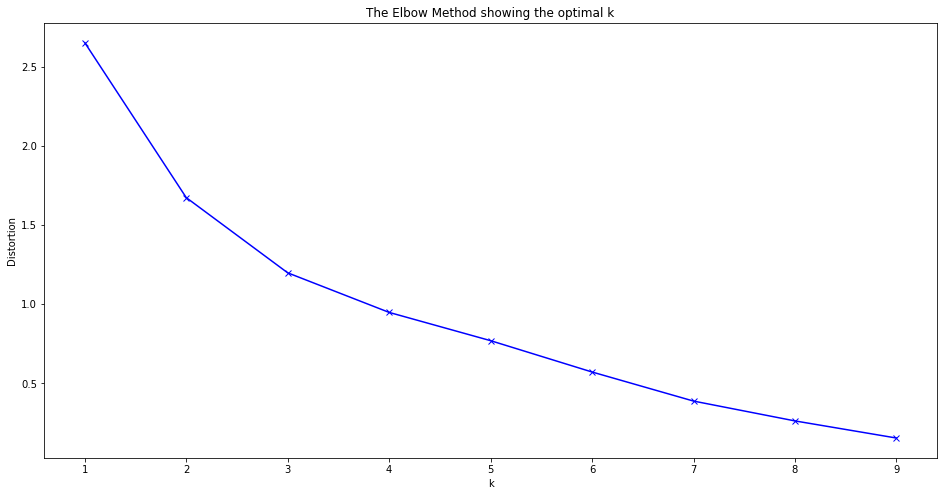

In [25]:
vietnam_grouped_clustering = vietnam_grouped.drop('Area', 1)

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(vietnam_grouped_clustering)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### <font color=orange>By observation of the above curve, we can find the "elbow" when k = 3 in this case. Now I will run a K-Means using as n_clusters = 3</font>

#### Run k-means to cluster the areas into 3 clusters

In [26]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(vietnam_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

#### Create a new dataframe that includes the cluster as well as the top 10 venues for each area

In [27]:
# add clustering labels
areas_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
vietnam_merged = pd.merge(areas_venues_sorted, df, on='Area')

vietnam_merged # check the last columns!

,Cluster Labels,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,PostalCode,Latitude,Longitude,GDP per capita in USD
0,2,Bình Thuận Province,Asian Restaurant,Food Truck,Vietnamese Restaurant,Dessert Shop,Gym / Fitness Center,French Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,77000,10.933333,108.1,"3,090.17"
1,1,Cần Thơ,Coffee Shop,Hotel,Café,Vietnamese Restaurant,Bed & Breakfast,Multiplex,Park,Bakery,Asian Restaurant,Bar,94000,10.033333,105.783333,"6,260.52"
2,1,Da Nang,Vietnamese Restaurant,Train Station,Shopping Mall,Fast Food Restaurant,Burger Joint,Café,Pizza Place,Movie Theater,Dim Sum Restaurant,Food Truck,50000,16.069444,108.209722,"4,811.58"
3,1,Hai Phong,Vietnamese Restaurant,Restaurant,Café,Dessert Shop,Gym / Fitness Center,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,04000,20.865139,106.683833,"3,849.18"
4,1,Hanoi,Coffee Shop,Café,Hotel,Vietnamese Restaurant,Noodle House,Hotel Bar,Ice Cream Shop,Italian Restaurant,Sushi Restaurant,Steakhouse,10000,21.028333,105.854167,"3,923.21"
5,1,Ho Chi Minh City,Noodle House,Seafood Restaurant,Flea Market,Fast Food Restaurant,Multiplex,Pizza Place,Gym / Fitness Center,BBQ Joint,Sushi Restaurant,Supermarket,70000,10.8,106.65,"7,147.09"
6,1,Hà Tĩnh Province,Vietnamese Restaurant,Asian Restaurant,Hotel,Dim Sum Restaurant,Gym / Fitness Center,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,45000,18.333333,105.9,"2,117.32"
7,1,Hậu Giang Province,Vietnamese Restaurant,Supermarket,Shopping Plaza,Coffee Shop,Australian Restaurant,BBQ Joint,French Restaurant,Food Truck,Food Court,Food & Drink Shop,95000,9.783333,105.466667,"2,943.84"
8,1,Khánh Hòa Province,Restaurant,Hotel,Music Venue,Gym / Fitness Center,Coffee Shop,Café,Bowling Alley,Lounge,Bakery,Food Court,57000,12.25,109.2,"4,180.68"
9,1,Lâm Đồng Province,Vietnamese Restaurant,Hotel,Ice Cream Shop,Café,Dim Sum Restaurant,Hostel,Seafood Restaurant,Food Truck,Food Court,Food & Drink Shop,66000,11.95,108.433333,"3,331.80"


#### Visualize the resulting clusters by map

In [28]:
!conda install -c conda-forge folium=0.5.0
import folium

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |           1_llvm           5 KB  conda-forge
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    _pytorch_select-0.2        |            gpu_0           2 KB
    absl-py-0.12.0             |     pyhd8ed1ab_0          96 KB  conda-forge
    aiohttp-3.7.4              |   py37h5e8e339_0         632 KB  conda-forge
    alsa-lib-1.2.3             |       h516909a_0         560 KB  conda-forge
   

ipykernel-5.5.5      | 167 KB    | ##################################### | 100% 
future-0.18.2        | 714 KB    | ##################################### | 100% 
xorg-libxau-1.0.9    | 13 KB     | ##################################### | 100% 
yarl-1.6.3           | 141 KB    | ##################################### | 100% 
libclang-11.1.0      | 19.2 MB   | ##################################### | 100% 
libffi-3.3           | 51 KB     | ##################################### | 100% 
nest-asyncio-1.5.1   | 9 KB      | ##################################### | 100% 
notebook-6.3.0       | 6.1 MB    | ##################################### | 100% 
pyzmq-22.0.3         | 524 KB    | ##################################### | 100% 
typing_extensions-3. | 25 KB     | ##################################### | 100% 
python-3.7.10        | 57.3 MB   | ##################################### | 100% 
ptyprocess-0.7.0     | 16 KB     | ##################################### | 100% 
seaborn-0.11.1       | 4 KB 

pyqtwebengine-5.12.1 | 175 KB    | ##################################### | 100% 
libxml2-2.9.12       | 772 KB    | ##################################### | 100% 
jupyterlab_pygments- | 8 KB      | ##################################### | 100% 
cached_property-1.5. | 11 KB     | ##################################### | 100% 
botocore-1.20.72     | 4.6 MB    | ##################################### | 100% 
freetype-2.10.4      | 890 KB    | ##################################### | 100% 
libopus-1.3.1        | 255 KB    | ##################################### | 100% 
pickleshare-0.7.5    | 9 KB      | ##################################### | 100% 
pluggy-0.13.1        | 29 KB     | ##################################### | 100% 
partd-1.2.0          | 18 KB     | ##################################### | 100% 
libpq-13.3           | 2.7 MB    | ##################################### | 100% 
libgfortran-ng-7.5.0 | 22 KB     | ##################################### | 100% 
nbconvert-6.0.7      | 535 K

termcolor-1.1.0      | 6 KB      | ##################################### | 100% 
mpfr-4.0.2           | 648 KB    | ##################################### | 100% 
zstd-1.4.9           | 431 KB    | ##################################### | 100% 
libglib-2.68.2       | 3.1 MB    | ##################################### | 100% 
libwebp-base-1.2.0   | 815 KB    | ##################################### | 100% 
chardet-4.0.0        | 204 KB    | ##################################### | 100% 
imageio-2.9.0        | 3.1 MB    | ##################################### | 100% 
xlrd-2.0.1           | 92 KB     | ##################################### | 100% 
gast-0.4.0           | 12 KB     | ##################################### | 100% 
iniconfig-1.1.1      | 8 KB      | ##################################### | 100% 
gettext-0.19.8.1     | 3.6 MB    | ##################################### | 100% 
libevent-2.1.10      | 1.1 MB    | ##################################### | 100% 
pyyaml-5.4.1         | 189 K

pcre-8.44            | 261 KB    | ##################################### | 100% 
libcurl-7.76.1       | 328 KB    | ##################################### | 100% 
pyqtchart-5.12       | 256 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: \ b'Exception while loading config file /var/pod/.ws/ax-ext/config/wscloud/jupyter_notebook_config.py\n    Traceback (most recent call last):\n      File "/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/traitlets/config/application.py", line 737, in _load_config_files\n        config = loader.load_config()\n      File "/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/traitlets/config/loader.py", line 616, in load_config\n        self._read_file_as_dict()\n      File "/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/traitlets/config/loader.py", line 648, in _read_file_as_dict\n        exec(compile(f.read(), conf_filename, \'exec\'), name

In [29]:
# create map
map_clusters = folium.Map(location=[16, 108], zoom_start=6)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(vietnam_merged['Latitude'], vietnam_merged['Longitude'], vietnam_merged['Area'], vietnam_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [float(lat), float(lon)],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## <font color=blue>5. Examine Cluster</font>

#### Cluster 1

In [36]:
vietnam_merged.loc[vietnam_merged['Cluster Labels'] == 0, vietnam_merged.columns[1:]]

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,PostalCode,Latitude,Longitude,GDP per capita in USD
11,Đắk Lắk Province,Food,Vietnamese Restaurant,Dessert Shop,Gym / Fitness Center,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Flea Market,Fast Food Restaurant,63000,12.666667,108.05,"2,555.78"


#### Cluster 2

In [38]:
vietnam_merged.loc[vietnam_merged['Cluster Labels'] == 1, vietnam_merged.columns[1:]]

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,PostalCode,Latitude,Longitude,GDP per capita in USD
1,Cần Thơ,Coffee Shop,Hotel,Café,Vietnamese Restaurant,Bed & Breakfast,Multiplex,Park,Bakery,Asian Restaurant,Bar,94000,10.033333,105.783333,"6,260.52"
2,Da Nang,Vietnamese Restaurant,Train Station,Shopping Mall,Fast Food Restaurant,Burger Joint,Café,Pizza Place,Movie Theater,Dim Sum Restaurant,Food Truck,50000,16.069444,108.209722,"4,811.58"
3,Hai Phong,Vietnamese Restaurant,Restaurant,Café,Dessert Shop,Gym / Fitness Center,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,04000,20.865139,106.683833,"3,849.18"
4,Hanoi,Coffee Shop,Café,Hotel,Vietnamese Restaurant,Noodle House,Hotel Bar,Ice Cream Shop,Italian Restaurant,Sushi Restaurant,Steakhouse,10000,21.028333,105.854167,"3,923.21"
5,Ho Chi Minh City,Noodle House,Seafood Restaurant,Flea Market,Fast Food Restaurant,Multiplex,Pizza Place,Gym / Fitness Center,BBQ Joint,Sushi Restaurant,Supermarket,70000,10.8,106.65,"7,147.09"
6,Hà Tĩnh Province,Vietnamese Restaurant,Asian Restaurant,Hotel,Dim Sum Restaurant,Gym / Fitness Center,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,45000,18.333333,105.9,"2,117.32"
7,Hậu Giang Province,Vietnamese Restaurant,Supermarket,Shopping Plaza,Coffee Shop,Australian Restaurant,BBQ Joint,French Restaurant,Food Truck,Food Court,Food & Drink Shop,95000,9.783333,105.466667,"2,943.84"
8,Khánh Hòa Province,Restaurant,Hotel,Music Venue,Gym / Fitness Center,Coffee Shop,Café,Bowling Alley,Lounge,Bakery,Food Court,57000,12.25,109.2,"4,180.68"
9,Lâm Đồng Province,Vietnamese Restaurant,Hotel,Ice Cream Shop,Café,Dim Sum Restaurant,Hostel,Seafood Restaurant,Food Truck,Food Court,Food & Drink Shop,66000,11.95,108.433333,"3,331.80"
10,Điện Biên Province,Historic Site,Vietnamese Restaurant,Hotel,History Museum,Steakhouse,Cultural Center,Food Truck,Food Court,Food & Drink Shop,Food,32000,21.383333,103.016667,"1,589.03"


#### Cluster 3

In [40]:
vietnam_merged.loc[vietnam_merged['Cluster Labels'] == 2, vietnam_merged.columns[1:]]

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,PostalCode,Latitude,Longitude,GDP per capita in USD
0,Bình Thuận Province,Asian Restaurant,Food Truck,Vietnamese Restaurant,Dessert Shop,Gym / Fitness Center,French Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,77000,10.933333,108.1,"3,090.17"
